In [1]:
from contexts import *
from transformembeddings import *
from vizembeddings import *
%matplotlib inline

/usr/local/lib/python3.7/site-packages/sklearn/utils/linear_assignment_.py:21: DeprecationWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker

In [3]:
engine = create_engine('sqlite:///../embed_wiki_data/wikidb.db')

session = sessionmaker()
session.configure(bind=engine)
s = session()

# Load labeled data

In [4]:
labeled = LabeledContexts("coded_jsons/mouse_coded_200.json",
                                   context_data = {
                                       "word": "mouse",
                                       "context_type": "sentence",
                                       "window_size": None,
                                       "randomized": False,
                                   }
                                  )

# FT

In [7]:
ft = ContextEmbeddings(labeled, 
                                tf_idf_weighting = True, 
                                mask_pct = None, 
                                exclude_word = False
                           )

elmo = ContextEmbeddings(labeled, 
                                tf_idf_weighting = True, 
                                mask_pct = None, 
                                exclude_word = False
                           )

bert = ContextEmbeddings(labeled, 
                                tf_idf_weighting = True, 
                                mask_pct = None, 
                                exclude_word = False
                           )

#f 

ft.extract_embeddings("fastText",
                              ft_path = "../embed_wiki_data/wiki.en.bin")

ft.pickle_embeddings("pickles/ft_mouse.pkl")

ft.extract_embeddings("fastText",
                              use_pkl = True,
                              pkl_path = "pickles/ft_mouse.pkl")

# e


elmo.extract_embeddings("ELMO")

elmo.pickle_embeddings("pickles/elmo_mouse.pkl")

elmo.extract_embeddings("fastText",
                              use_pkl = True,
                              pkl_path = "pickles/elmo_mouse.pkl")


# b

bert.extract_embeddings("BERT",
                             bert_path = "uncased_L-12_H-768_A-12/"
                              )

bert.pickle_embeddings("pickles/bert_mouse.pkl")

bert.extract_embeddings("BERT",
                              use_pkl = True,
                              pkl_path = "pickles/bert_mouse.pkl")

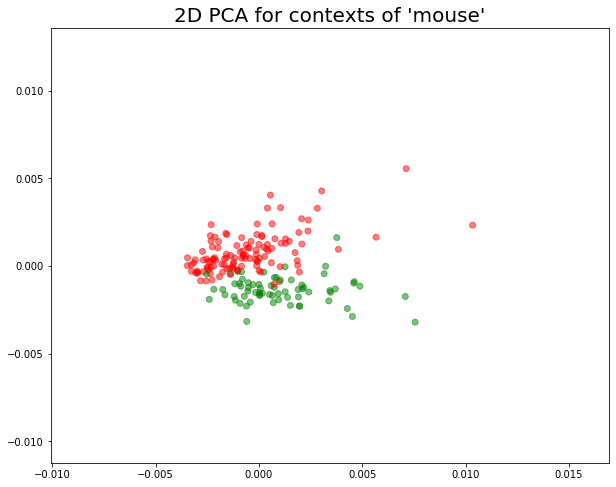

In [8]:
# Decide to use: 
ft.decompose_embeddings("PCA", 2)

plot_labeled_data(ft)

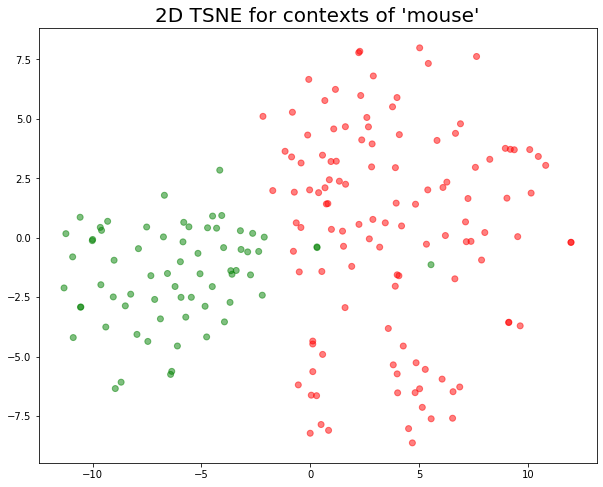

In [9]:
# Decide to use: 
bert.decompose_embeddings("TSNE", 2)

plot_labeled_data(bert)

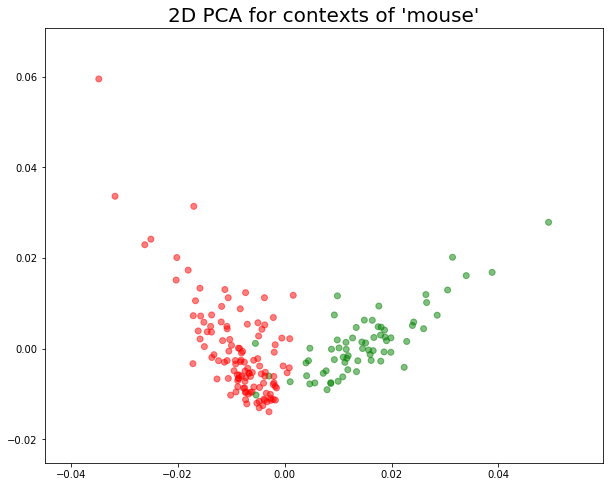

In [10]:
# Decide to use: 
elmo.decompose_embeddings("PCA", 2)

plot_labeled_data(elmo)